# Explore Tweets data

In [1]:
import os
import pandas as pd

# Set data directory
data_dir = os.path.realpath("./data")

# Check if tweets.h5 exists (if previously converted)
if os.path.exists(os.path.join(data_dir, "tweets.h5")):
    # Store tweets in tweets pandas dataframe
    tweets = pd.read_hdf(os.path.join(data_dir, "tweets.h5"), "tweets")
else:
    # Convert tweets to hdf format
    # ? hdf manages large data well
    tweets = pd.read_csv(os.path.join(data_dir, "tweets.csv"))
    tweets.to_hdf(os.path.join(data_dir, "tweets.h5"), "tweets")

In [2]:
# Convert createdAt to datetime
tweets['createdAt'] = pd.to_datetime(tweets['createdAt'])

# Min and max dates
min_date = tweets['createdAt'].min()
max_date = tweets['createdAt'].max()
print(f"{'Start':<10}{min_date:%Y-%m-%d %H:%M:%S}")
print(f"{'End':<10}{max_date:%Y-%m-%d %H:%M:%S}")

# Duration of the data
duration = pd.Timestamp(max_date) - pd.Timestamp(min_date)
print(f'\n{"Duration":<9} {duration}')

# Number of tweets in the first day
print('\n# of Tweets in the 1st day: ', tweets[tweets['createdAt'].dt.day == min_date.day].shape[0])

# Number of tweets in the last day
print('# of Tweets in the 2nd day: ', tweets[tweets['createdAt'].dt.day == max_date.day].shape[0])

Start     2019-11-11 09:23:24
End       2019-11-12 10:52:09

Duration  1 days 01:28:45

# of Tweets in the 1st day:  5031
# of Tweets in the 2nd day:  1024


In [3]:
# Add an index that gets incremented for each hour
tweets['hour'] = tweets['createdAt'].dt.hour
tweets.loc[tweets['createdAt'].dt.day == max_date.day, 'hour'] += 24

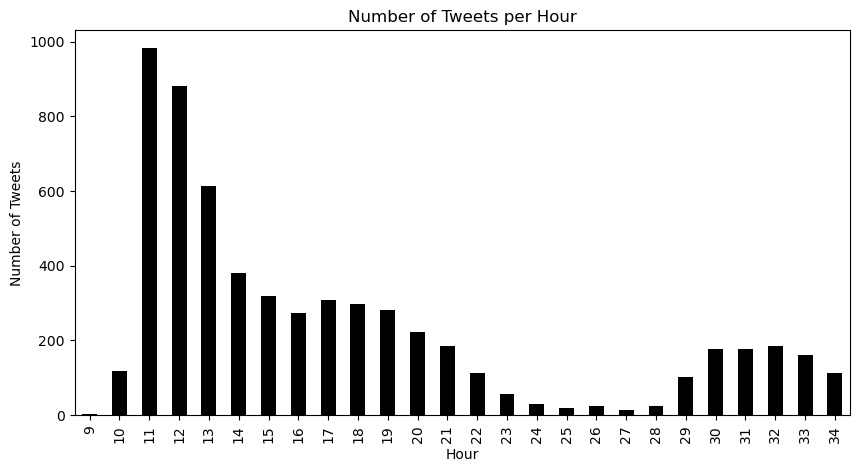

In [4]:
import matplotlib.pyplot as plt

# Plot a bar chart for number of tweets for each hour
tweets["hour"].value_counts().sort_index().plot(
    kind="bar",
    figsize=(10, 5),
    color="black",
    title="Number of Tweets per Hour",
    xlabel="Hour",
    ylabel="Number of Tweets"
)
plt.show()